In [140]:
# Here we import all libraries
import numpy as np
import gym
import matplotlib.pyplot as plt
import os
import torch
import random
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from collections import deque 
import sys
env = gym.make("CartPole-v0")

In [141]:
#Hyperparameters
episodes = 20000*5
eps = 1.0
learning_rate = 0.001
tot_rewards = []
tot_loss = []
decay_val = 0.0001
mem_size = 1000000
batch_size = 300
gamma = 0.99
update_target = 100
max_steps = 200

In [142]:
class NeuralNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(NeuralNetwork, self).__init__()
        self.state_size = state_size
        self.action_size = action_size
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(state_size, 300),
            nn.ReLU(),
            nn.Linear(300, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, action_size)
        )
    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x

In [143]:
model = NeuralNetwork(env.observation_space.shape[0], env.action_space.n)
target = NeuralNetwork(env.observation_space.shape[0], env.action_space.n)

opt = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
replay_buffer = deque(maxlen=mem_size)

In [144]:
#Testing code

# state = torch.tensor(env.reset(), dtype=torch.float32)
# print("state = ", state)
# out = model(state)
# print("out = ", out)

In [145]:
def compute_td_loss(batch_size):
    state, next_state, reward, done, action = zip(*random.sample(replay_buffer, batch_size))
    state = torch.stack(list(state), dim=0).reshape(batch_size, -1)

    next_state = torch.from_numpy(np.array(next_state).reshape(batch_size, -1)).type(torch.float32)
    
    reward = torch.from_numpy(np.array(reward))
    done = torch.from_numpy(np.array(done)).long()
    action = torch.from_numpy(np.array(action)).type(torch.int64)
    
    q_values = model(state)
    
    next_q_values_m = model(next_state)
    action_indices = torch.argmax(next_q_values_m, dim = -1).reshape(-1,1)


    next_q_values_t = target(next_state)

    max_next_q_values = next_q_values_t.gather(dim = -1, index = action_indices).reshape(-1)
    q_vals = q_values.gather(dim=-1, index=action.reshape(-1,1))

    loss = ((reward + gamma*max_next_q_values*(1-done).detach() - q_vals.squeeze())**2).mean()

    opt.zero_grad()
    loss.backward()
    opt.step()
    return loss
    

Episode =  0  Epsilon =  1.0


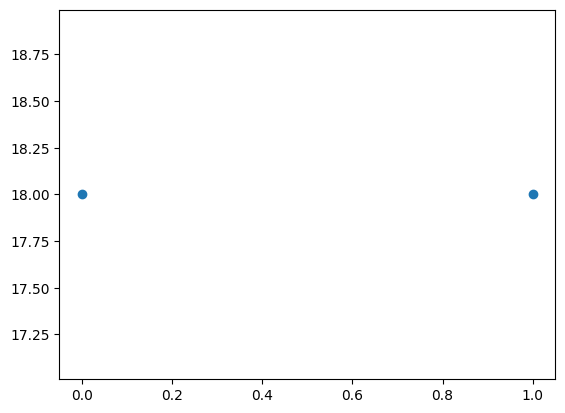

Episode =  1  Epsilon =  0.9982017088605984
Episode =  2  Epsilon =  0.9939188703524563
Episode =  3  Epsilon =  0.9903473735423333
Episode =  4  Epsilon =  0.9879735083147863
Episode =  5  Epsilon =  0.9864927329490045
Episode =  6  Epsilon =  0.9850141769703474
Episode =  7  Epsilon =  0.9835378370523961
Episode =  8  Epsilon =  0.9818673265897263
Episode =  9  Epsilon =  0.9779478973357154
Episode =  10  Epsilon =  0.9752136097242452
Episode =  11  Epsilon =  0.9726814741462475
Episode =  12  Epsilon =  0.9711265058410872
Episode =  13  Epsilon =  0.9676369099381467
Episode =  14  Epsilon =  0.9659934067385525
Episode =  15  Epsilon =  0.9649314512706114
Episode =  16  Epsilon =  0.962907322506727
Episode =  17  Epsilon =  0.9614641163572715
Episode =  18  Epsilon =  0.9582008522146408
Episode =  19  Epsilon =  0.9518026842039732
Episode =  20  Epsilon =  0.9472452058877892
Episode =  21  Epsilon =  0.9458254741293678
Episode =  22  Epsilon =  0.9446912209601311
Episode =  23  Epsil

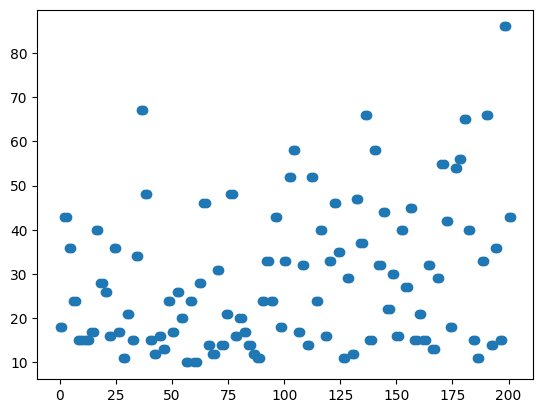

Episode =  101  Epsilon =  0.7458838850372449
Episode =  102  Epsilon =  0.7420155486394936
Episode =  103  Epsilon =  0.7399409146761808
Episode =  104  Epsilon =  0.7370609087685835
Episode =  105  Epsilon =  0.7325787458242249
Episode =  106  Epsilon =  0.7255074368399572
Episode =  107  Epsilon =  0.7197268196683503
Episode =  108  Epsilon =  0.7124945249640197
Episode =  109  Epsilon =  0.7113555021355117
Episode =  110  Epsilon =  0.7097923183213503
Episode =  111  Epsilon =  0.7085867566750061
Episode =  112  Epsilon =  0.7052643787385493
Episode =  113  Epsilon =  0.7040665076661337
Episode =  114  Epsilon =  0.7013261325075206
Episode =  115  Epsilon =  0.6990855876924104
Episode =  116  Epsilon =  0.6973401437079447
Episode =  117  Epsilon =  0.6895738945784886
Episode =  118  Epsilon =  0.6879897762599176
Episode =  119  Epsilon =  0.6868899277228646
Episode =  120  Epsilon =  0.67537959966366
Episode =  121  Epsilon =  0.6744347769946587
Episode =  122  Epsilon =  0.6704004

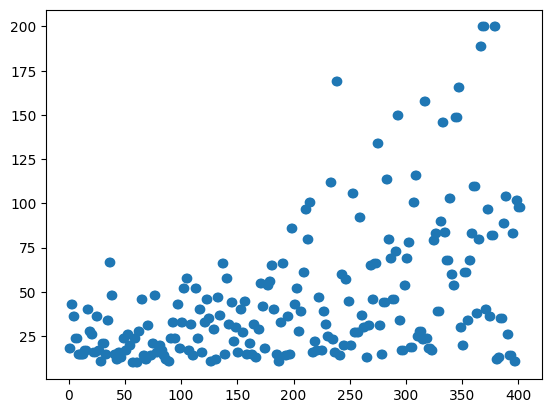

Episode =  201  Epsilon =  0.39480885875014965
Episode =  202  Epsilon =  0.39029478822602376
Episode =  203  Epsilon =  0.3867207207927243
Episode =  204  Epsilon =  0.38602528434709976
Episode =  205  Epsilon =  0.3854081685716841
Episode =  206  Epsilon =  0.38429215967733493
Episode =  207  Epsilon =  0.38340934747314015
Episode =  208  Epsilon =  0.3821462450457608
Episode =  209  Epsilon =  0.37910142285096915
Episode =  210  Epsilon =  0.3721156547007904
Episode =  211  Epsilon =  0.37170657297056386
Episode =  212  Epsilon =  0.36992674541343407
Episode =  213  Epsilon =  0.36536820306325085
Episode =  214  Epsilon =  0.3647111646610632
Episode =  215  Epsilon =  0.36155209734685817
Episode =  216  Epsilon =  0.3575255061824052
Episode =  217  Epsilon =  0.35688257123252726
Episode =  218  Epsilon =  0.35449956912441277
Episode =  219  Epsilon =  0.3511830510520948
Episode =  220  Epsilon =  0.3470636492830648
Episode =  221  Epsilon =  0.3436104800668229
Episode =  222  Epsilo

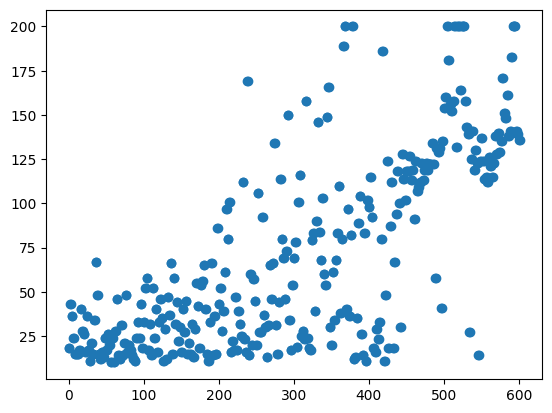

Episode =  301  Epsilon =  0.11905215648595577
Episode =  302  Epsilon =  0.1171860071194116
Episode =  303  Epsilon =  0.11531451193786006
Episode =  304  Epsilon =  0.11337083051720523
Episode =  305  Epsilon =  0.11112604878323525
Episode =  306  Epsilon =  0.10892571450554812
Episode =  307  Epsilon =  0.10676894760910573
Episode =  308  Epsilon =  0.10465488544466081
Episode =  309  Epsilon =  0.10258268244372001
Episode =  310  Epsilon =  0.10055150978033942
Episode =  311  Epsilon =  0.0985605550396157
Episode =  312  Epsilon =  0.09660902189274238
Episode =  313  Epsilon =  0.09492366204305164
Episode =  314  Epsilon =  0.09304414063790985
Episode =  315  Epsilon =  0.0912018344079557
Episode =  316  Epsilon =  0.08939600647982325
Episode =  317  Epsilon =  0.08762593457049453
Episode =  318  Epsilon =  0.08589091069840553
Episode =  319  Epsilon =  0.0841902409002728
Episode =  320  Epsilon =  0.08252324495352638
Episode =  321  Epsilon =  0.08088925610423851
Episode =  322  E

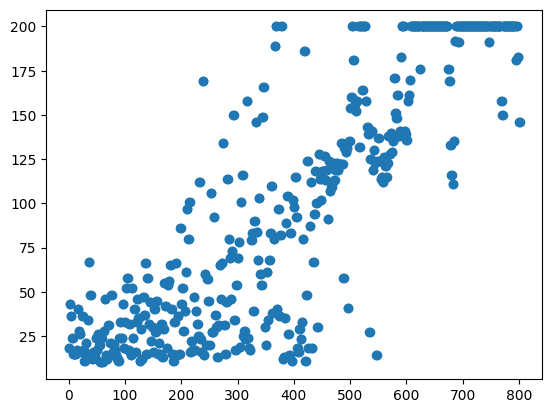

Episode =  401  Epsilon =  0.017287058629241323
Episode =  402  Epsilon =  0.0170501475118061
Episode =  403  Epsilon =  0.016899081990776943
Episode =  404  Epsilon =  0.01673261477456141
Episode =  405  Epsilon =  0.016557850177215356
Episode =  406  Epsilon =  0.01622999900542755
Episode =  407  Epsilon =  0.015932519070873702
Episode =  408  Epsilon =  0.015665535215216866
Episode =  409  Epsilon =  0.015470944480096052
Episode =  410  Epsilon =  0.015252820321051507
Episode =  411  Epsilon =  0.014998726012326108
Episode =  412  Epsilon =  0.0148227899064028
Episode =  413  Epsilon =  0.014615265430308355
Episode =  414  Epsilon =  0.014439495062133559
Episode =  415  Epsilon =  0.014153588055760273
Episode =  416  Epsilon =  0.013873342107196932
Episode =  417  Epsilon =  0.013669538699122748
Episode =  418  Epsilon =  0.013474117521924692
Episode =  419  Epsilon =  0.013256280492607093
Episode =  420  Epsilon =  0.01299380154476458
Episode =  421  Epsilon =  0.01273651977105389


KeyboardInterrupt: 

In [146]:
for i in range(episodes):
    print("Episode = ", i, " Epsilon = ", eps)
    state = torch.tensor(env.reset(), dtype=torch.float32).unsqueeze(0)

    done = False
    steps = 0
    eps_rew = 0 
    eps_loss = 0
    while not done and steps<max_steps:
        if np.random.uniform(0,1)<eps:
            action = env.action_space.sample()
        else:
#             action = env.action_space.sample()
            action = np.argmax(model(state).detach().numpy())
                

        next_state, reward, done, info = env.step(action)
        replay_buffer.append((state, next_state, reward, done, action))
        if len(replay_buffer)>batch_size and steps%4==0:
            loss = compute_td_loss(batch_size)
            eps_loss += loss.detach().numpy()
        eps = eps/(1 + decay_val)
        eps_rew += reward 
        
        if steps%50==0:
            target.load_state_dict(model.state_dict())
        
        if done:
            tot_rewards.append(eps_rew)
            break
        
        state = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)
        steps += 1
    tot_rewards.append(eps_rew)
    tot_loss.append(eps_loss)
    
    if(i%100)==0:
        plt.scatter(np.arange(len(tot_rewards)), tot_rewards)
        plt.show()

In [ ]:
plt.plot(tot_loss)

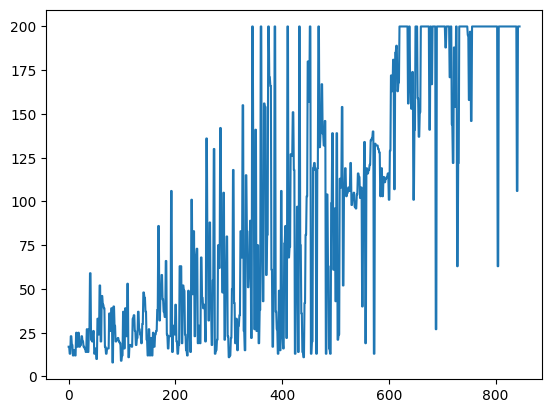

In [9]:
#Plot
plt.plot(tot_rewards)

In [152]:
#Render the final environment
state, info = env.reset(seed=42, return_info=True)
import time
for i in range(1000):
    
    env.render()
    
    state = torch.tensor(state, dtype=torch.float32)
    action = np.argmax(model(state).detach().numpy())
    state, reward, done, info = env.step(action)

    if done:
        state, info = env.reset(return_info=True)
env.close()
